<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/MDS-29_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BF%D0%BE_%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Итоговая работа.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции:

$tg^2(sin(x) + cos(2x+3))$

в точке $x_0=1$


In [ ]:
### YOUR CODE HERE
import sympy as sym
x = sym.Symbol('x')

In [ ]:
sym.tan(sym.sin(x) + sym.cos(2*x + 3)) ** 2

tan(sin(x) + cos(2*x + 3))**2

In [ ]:
res = sym.diff(sym.tan(sym.sin(x) + sym.cos(2 * x + 3)) ** 2)

In [ ]:
res

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [ ]:
res.subs(x, 1).evalf()

55.3859176353379

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

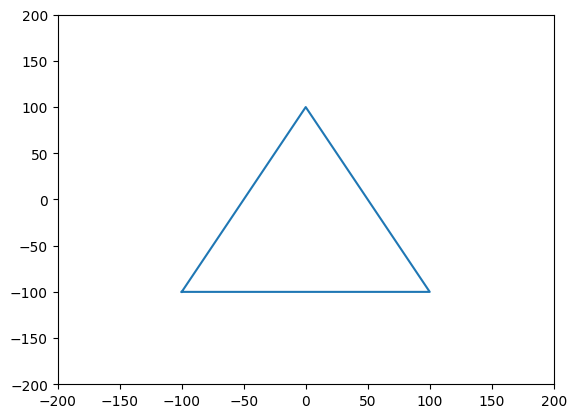

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 200.0)

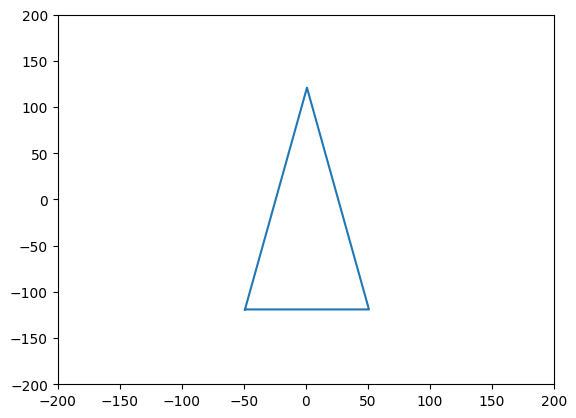

In [ ]:
### YOUR CODE HERE
B1 = np.array([[0.5, 0, 1], [0, 1.2, 1]])
res = B1 @ A.transpose()
mm = res.transpose()

A1 = np.array(mm)

x = A1[:,0]
y = A1[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(0.0, 400.0)

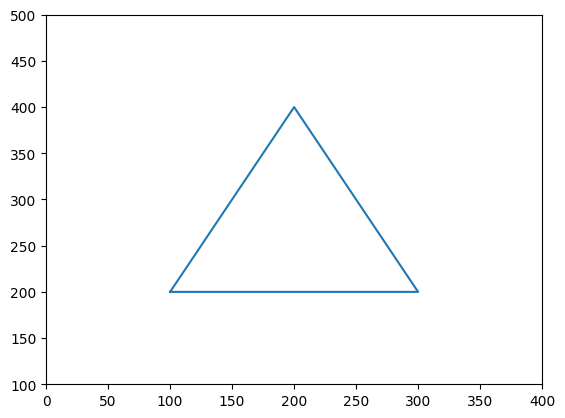

In [ ]:
B2 = np.array([[1, 0, 200], [0, 1, 300]])
res = B2 @ A.transpose()
mm = res.transpose()

A2 = np.array(mm)

x = A2[:,0]
y = A2[:,1]
plt.plot(x, y)
plt.ylim([100, 500])
plt.xlim([0, 400])

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
### YOUR CODE HERE
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

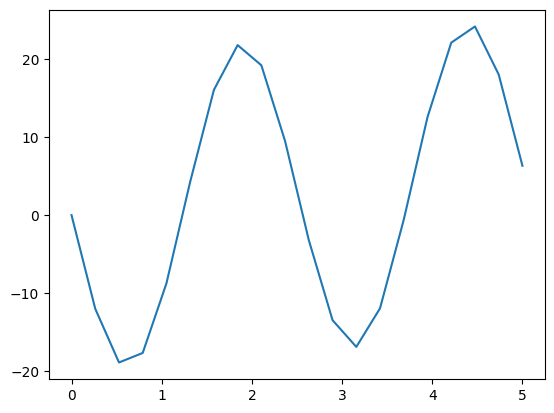

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Best parameters: [ 3.  -2.5]
Best RMSE: 9.637002968333997e-08


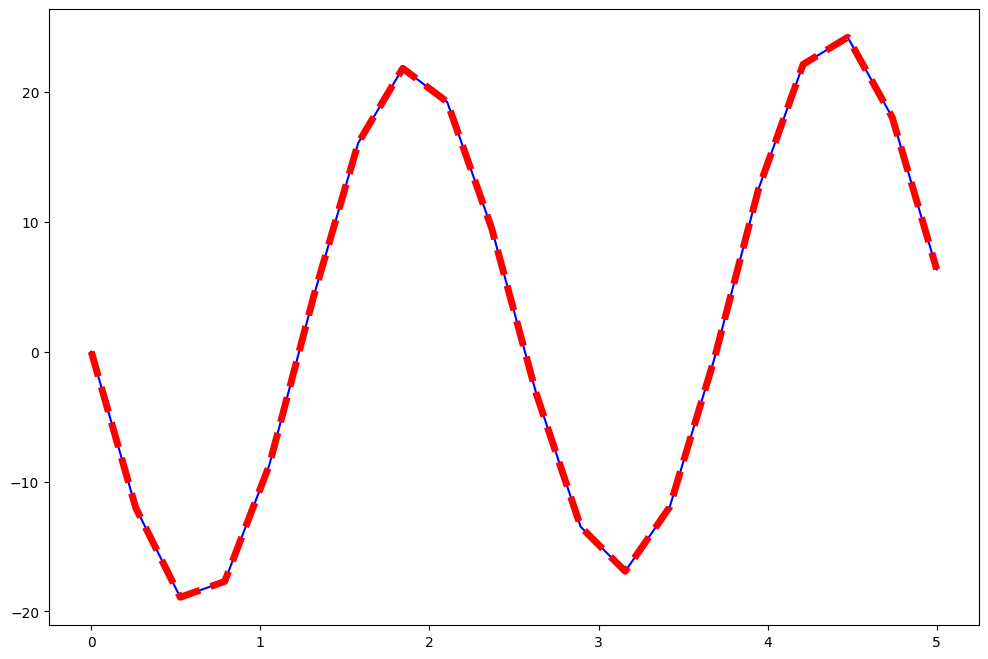

In [ ]:
### YOUR CODE HERE
from scipy.optimize import curve_fit

a_range = np.arange(0, 2, 0.1)
b_range = np.arange(0, 2, 0.1)
best_params = None
best_rmse = float('inf')
for a in a_range:
    for b in b_range:
      params, _ = curve_fit(f, x, fx, [a, b])
      fx_pred = f(x, *params)
      rmse = np.sqrt(np.mean((fx - fx_pred) ** 2))
      if rmse < best_rmse:
        best_params = params
        best_rmse = rmse
print('Best parameters:', best_params)
print('Best RMSE:', best_rmse)
plt.figure(figsize = (12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, best_params[0], best_params[1]), color = 'red', linestyle = '--', linewidth = 5)
plt.show()

In [ ]:
round(error([3, -2.5]), 2)

0.0

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
max_cos = 0
cos_ =''
for i in raitings:
  for n in raitings:
    if np.array_equal(i,n) == True:
      pass
    else:
      a = np.dot(i, n) / (np.linalg.norm(i) * np.linalg.norm(n))
      if a > max_cos:
        max_cos = a
        cos_ = (i, n)
      else:
        continue
  print(cos_, max_cos)
  max_cos = 0
  cos_ = ''

(array([ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6]), array([ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4])) 0.9106598233573044
(array([ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7]), array([ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6])) 0.8713805223930228
(array([ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6]), array([ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10])) 0.9187305147356807
(array([6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]), array([ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10])) 0.8588686958710952
(array([ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6]), array([ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4])) 0.8794847716076252
(array([ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1]), array([ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10])) 0.8551490764118892
(array([ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2]